# 1. Import Library

In [1]:
pip install category_encoders

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV

# 2. Data Loading & Splitting

In [3]:
# Load dataset
df = pd.read_csv('real_estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
# Shuffle the dataset
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,167,2013.417,0.0,292.9978,6,24.97744,121.54458,73.6
1,102,2012.833,12.7,170.1289,1,24.97371,121.52984,32.9
2,282,2013.333,4.7,387.7721,9,24.98118,121.53788,44.8
3,159,2013.000,11.6,390.5684,5,24.97937,121.54245,39.4
4,10,2013.417,17.9,1783.1800,3,24.96731,121.51486,22.1


In [5]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [6]:
# Size of Dataset
R = df.shape[0]
C = df.shape[1]
print(f"Number of rows: {R}")
print(f"Number of columns: {C}")

Number of rows: 414
Number of columns: 8


In [7]:
# Get testing data
df_test = df.iloc[:R//5, :]
df_test.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,167,2013.417,0.0,292.9978,6,24.97744,121.54458,73.6
1,102,2012.833,12.7,170.1289,1,24.97371,121.52984,32.9
2,282,2013.333,4.7,387.7721,9,24.98118,121.53788,44.8
3,159,2013.000,11.6,390.5684,5,24.97937,121.54245,39.4
4,10,2013.417,17.9,1783.1800,3,24.96731,121.51486,22.1


In [8]:
# Display the shape
print(f"Number of rows: {df_test.shape[0]}")
print(f"Number of columns: {df_test.shape[1]}")

Number of rows: 82
Number of columns: 8


In [9]:
# Get training data
df_train = df.iloc[R//5:, :]
df_train.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
82,205,2013.000,18.0,1414.8370,1,24.95182,121.54887,26.6
83,306,2013.083,16.2,289.3248,5,24.98203,121.54348,55.0
84,129,2013.083,41.3,124.9912,6,24.96674,121.54039,60.7
85,413,2013.000,8.1,104.8101,5,24.96674,121.54067,52.5
86,297,2012.750,12.5,1144.4360,4,24.99176,121.53456,34.1


In [10]:
# Display the shape
print(f"Number of rows: {df_train.shape[0]}")
print(f"Number of columns: {df_train.shape[1]}")

Number of rows: 332
Number of columns: 8


# 3. EDA & Data Preprocessing

### 3.1 Training Data

In [11]:
# Size of Dataset
print(f"Number of rows: {df_train.shape[0]}")
print(f"Number of columns: {df_train.shape[1]}")

Number of rows: 332
Number of columns: 8


In [12]:
# Drop unnecessary columns
df_train = df_train.drop(['No'], axis=1)
df_train = df_train.reset_index(drop=True)
df_train.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [13]:
# Remove duplicated columns
# This will retain the first occurrences, change as you want
dup_cols = df_train.columns.duplicated()
cols = list(df_train.columns)
print(f"Duplicated Columns: \n{[cols[i] for i in range(len(cols)) if dup_cols[i]]}")

df_train = df_train.loc[:,~df_train.columns.duplicated()].copy()

print("After removing...")

dup_cols = df_train.columns.duplicated()
cols = list(df_train.columns)
print(f"Duplicated Columns: \n{[cols[i] for i in range(len(cols)) if dup_cols[i]]}")

Duplicated Columns: 
[]
After removing...
Duplicated Columns: 
[]


In [14]:
# Check for missing values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     332 non-null    float64
 1   X2 house age                            332 non-null    float64
 2   X3 distance to the nearest MRT station  332 non-null    float64
 3   X4 number of convenience stores         332 non-null    int64  
 4   X5 latitude                             332 non-null    float64
 5   X6 longitude                            332 non-null    float64
 6   Y house price of unit area              332 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 18.3 KB


In [15]:
# Remove row with missing values
df_train = df_train.dropna()
df_train = df_train.reset_index(drop=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     332 non-null    float64
 1   X2 house age                            332 non-null    float64
 2   X3 distance to the nearest MRT station  332 non-null    float64
 3   X4 number of convenience stores         332 non-null    int64  
 4   X5 latitude                             332 non-null    float64
 5   X6 longitude                            332 non-null    float64
 6   Y house price of unit area              332 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 18.3 KB


In [16]:
# Rename columns
headers = ["Transaction date", "House age", "Distance to the nearest MRT station",
           "Number of convenience stores", "Latitude", "Longitude", "House price of unit area"]
df_train.columns = headers
df_train.columns

Index(['Transaction date', 'House age', 'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude',
       'House price of unit area'],
      dtype='object')

In [17]:
# Drop duplicated rows
print("Number of duplicated rows:", df_train.shape[0] - df_train.drop_duplicates().shape[0])
df_train = df_train.drop_duplicates()
df_train = df_train.reset_index(drop=True)
print()
print("Removing duplicates...")
print()
print("Number of duplicated rows:", df_train.shape[0] - df_train.drop_duplicates().shape[0])

Number of duplicated rows: 0

Removing duplicates...

Number of duplicated rows: 0


In [18]:
# Check invalid datatypes
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     332 non-null    float64
 1   House age                            332 non-null    float64
 2   Distance to the nearest MRT station  332 non-null    float64
 3   Number of convenience stores         332 non-null    int64  
 4   Latitude                             332 non-null    float64
 5   Longitude                            332 non-null    float64
 6   House price of unit area             332 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 18.3 KB


In [19]:
# # Change the data type of invalid columns
# df_train["Target class"] = df_train["Target class"].astype("int64")
# df_train.info()

In [20]:
# Show unique values on each X's columns
X = df_train.drop(['House price of unit area'], axis=1)

print(f"Number of rows: {X.shape[0]}\n")

for col in X.columns:
    print(X[col].value_counts())

Number of rows: 332

Transaction date
2013.417    46
2013.500    39
2013.083    35
2012.917    32
2012.833    27
2013.250    26
2013.333    25
2013.000    23
2012.750    22
2012.667    21
2013.583    19
2013.167    17
Name: count, dtype: int64
House age
0.0     15
13.6     6
13.2     5
16.4     5
13.3     5
        ..
37.2     1
1.8      1
38.6     1
15.4     1
42.7     1
Name: count, Length: 198, dtype: int64
Distance to the nearest MRT station
90.45606      9
289.32480     9
104.81010     8
1360.13900    7
492.23130     7
             ..
490.34460     1
2251.93800    1
1402.01600    1
1978.67100    1
443.80200     1
Name: count, Length: 213, dtype: int64
Number of convenience stores
0     56
5     53
1     37
6     32
3     32
8     25
7     24
4     23
2     20
9     20
10    10
Name: count, dtype: int64
Latitude
24.97433    11
24.96674     9
24.98203     9
24.95204     7
24.96515     7
            ..
24.97217     1
24.95957     1
24.98569     1
24.98674     1
24.97927     1
Name: c

In [21]:
# # Drop poor features (to avoid overfitting)
# df_train = df_train.drop(['VendorID'], axis=1)
# df_train = df_train.reset_index(drop=True)
# df_train = df_train.drop(['payment_type'], axis=1)
# df_train = df_train.reset_index(drop=True)
# df_train.columns

In [22]:
# Show unique values on y's column
y = df_train['House price of unit area']

print(f"Number of rows: {y.shape[0]}\n")

print(y.value_counts())

Number of rows: 332

House price of unit area
42.0    4
40.6    4
31.3    4
42.5    4
29.3    3
       ..
49.0    1
25.0    1
22.6    1
31.9    1
55.2    1
Name: count, Length: 240, dtype: int64


<Axes: >

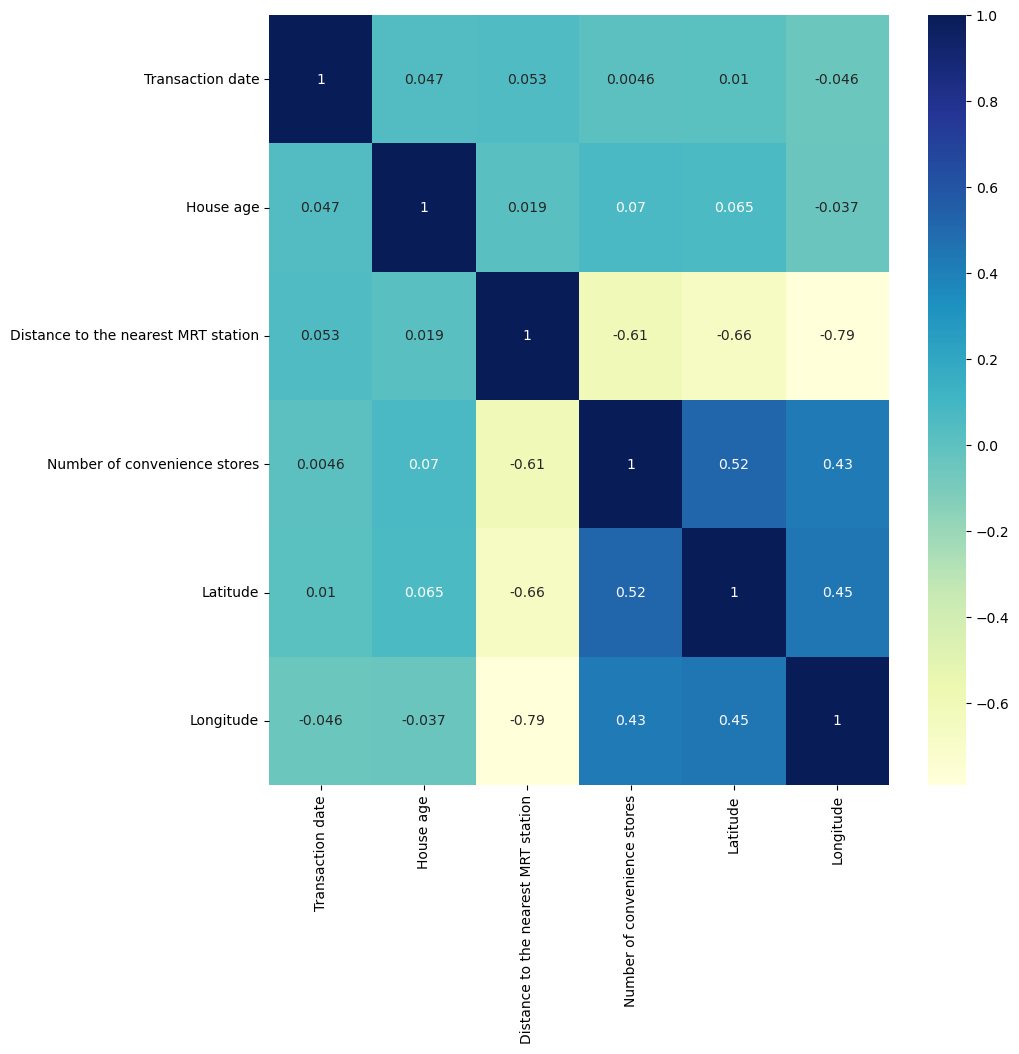

In [23]:
# Displaying heatmap
X = df_train.drop(['House price of unit area'], axis=1)

plt.subplots(figsize=(10, 10))
sns.heatmap(X.corr(method="pearson"), cmap="YlGnBu", annot=True)

In [24]:
# # Drop correlated features
# df_train = df_train.drop(['country'], axis=1)
# df_train = df_train.reset_index(drop=True)
# df_train.columns

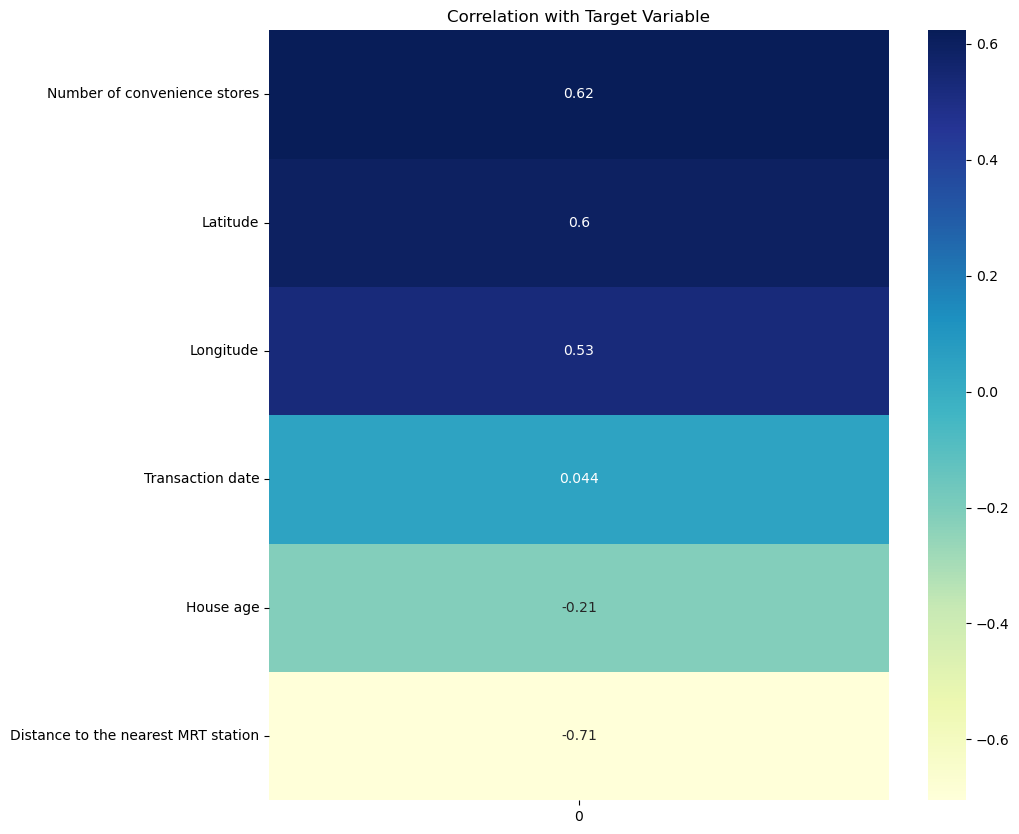

In [25]:
# Create a correlation matrix with target variable
X = df_train.drop(['House price of unit area'], axis=1)
y = df_train['House price of unit area']

corr_with_target = X.corrwith(y)
corr_with_target = corr_with_target.sort_values(ascending=False)
plt.figure(figsize=(10, 10))
sns.heatmap(corr_with_target.to_frame(), cmap='YlGnBu', annot=True)
plt.title('Correlation with Target Variable')
plt.show()

In [26]:
# # Drop unimportant features
# df_train = df_train.drop(['country'], axis=1)
# df_train = df_train.reset_index(drop=True)
# df_train.columns

In [27]:
# Show categorical columns
categorical_cols = list(set(df_train.columns.to_list()) - set(df_train._get_numeric_data().columns.to_list()))

print("Categorical columns:")
print(sorted(categorical_cols))

Categorical columns:
[]


In [28]:
# # Show unique values in categorical columns
# unique_values = []

# for col in categorical_cols:
#     unique_value = [col]
#     unique_value.append(", ".join(df_train[col].unique()))
#     unique_values.append(unique_value)

# pd.DataFrame(unique_values, columns=["col", "unique values"])

In [29]:
# # Encode categorical columns using OrdinalEncoder

# enc_maps = {
#     "buying price" : [{'col': "buying price", 'mapping': {"low": 0, "medium": 1, "high": 2, "very high": 3}}],
#     "maintenance cost" : [{'col': "maintenance cost", 'mapping': {"low": 0, "medium": 1, "high": 2, "very high": 3}}],
#     "number of doors" : [{'col': "number of doors", 'mapping': {"2": 0, "3": 1, "4": 2, "more": 3}}],
#     "number of persons" : [{'col': "number of persons", 'mapping': {"2": 0, "4": 1, "more": 2}}],
#     "luggage boot" : [{'col': "luggage boot", 'mapping': {"small": 0, "medium": 1, "big": 2}}],
#     "safety" : [{'col': "safety", 'mapping': {"low": 0, "medium": 1, "high": 2}}],
#     "decision" : [{'col': "decision", 'mapping': {"unaccepted": 0, "accepted": 1, "good": 2, "very good": 3}}]
# }

# for col in categorical_cols:
#     enc_map = enc_maps[col]

#     enc = OrdinalEncoder(mapping=enc_map)
#     df_train = enc.fit_transform(df_train)


# df_train

**Important**: We detect outliers BEFORE creating polynomial features because:
1. Polynomial features amplify outliers exponentially (outlier² creates extreme values)
2. One outlier affects multiple polynomial features simultaneously  
3. This prevents model instability in polynomial regression

Do it when the data is sufficient

In [30]:
# Show all numerical columns
numerical_columns = list(df_train.select_dtypes(include=[np.number]).columns.values)
numerical_columns

['Transaction date',
 'House age',
 'Distance to the nearest MRT station',
 'Number of convenience stores',
 'Latitude',
 'Longitude',
 'House price of unit area']

In [31]:
# Detect outliers
def detect_outliers_iqr(df, column):    
    """
    Detect outliers using IQR method
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

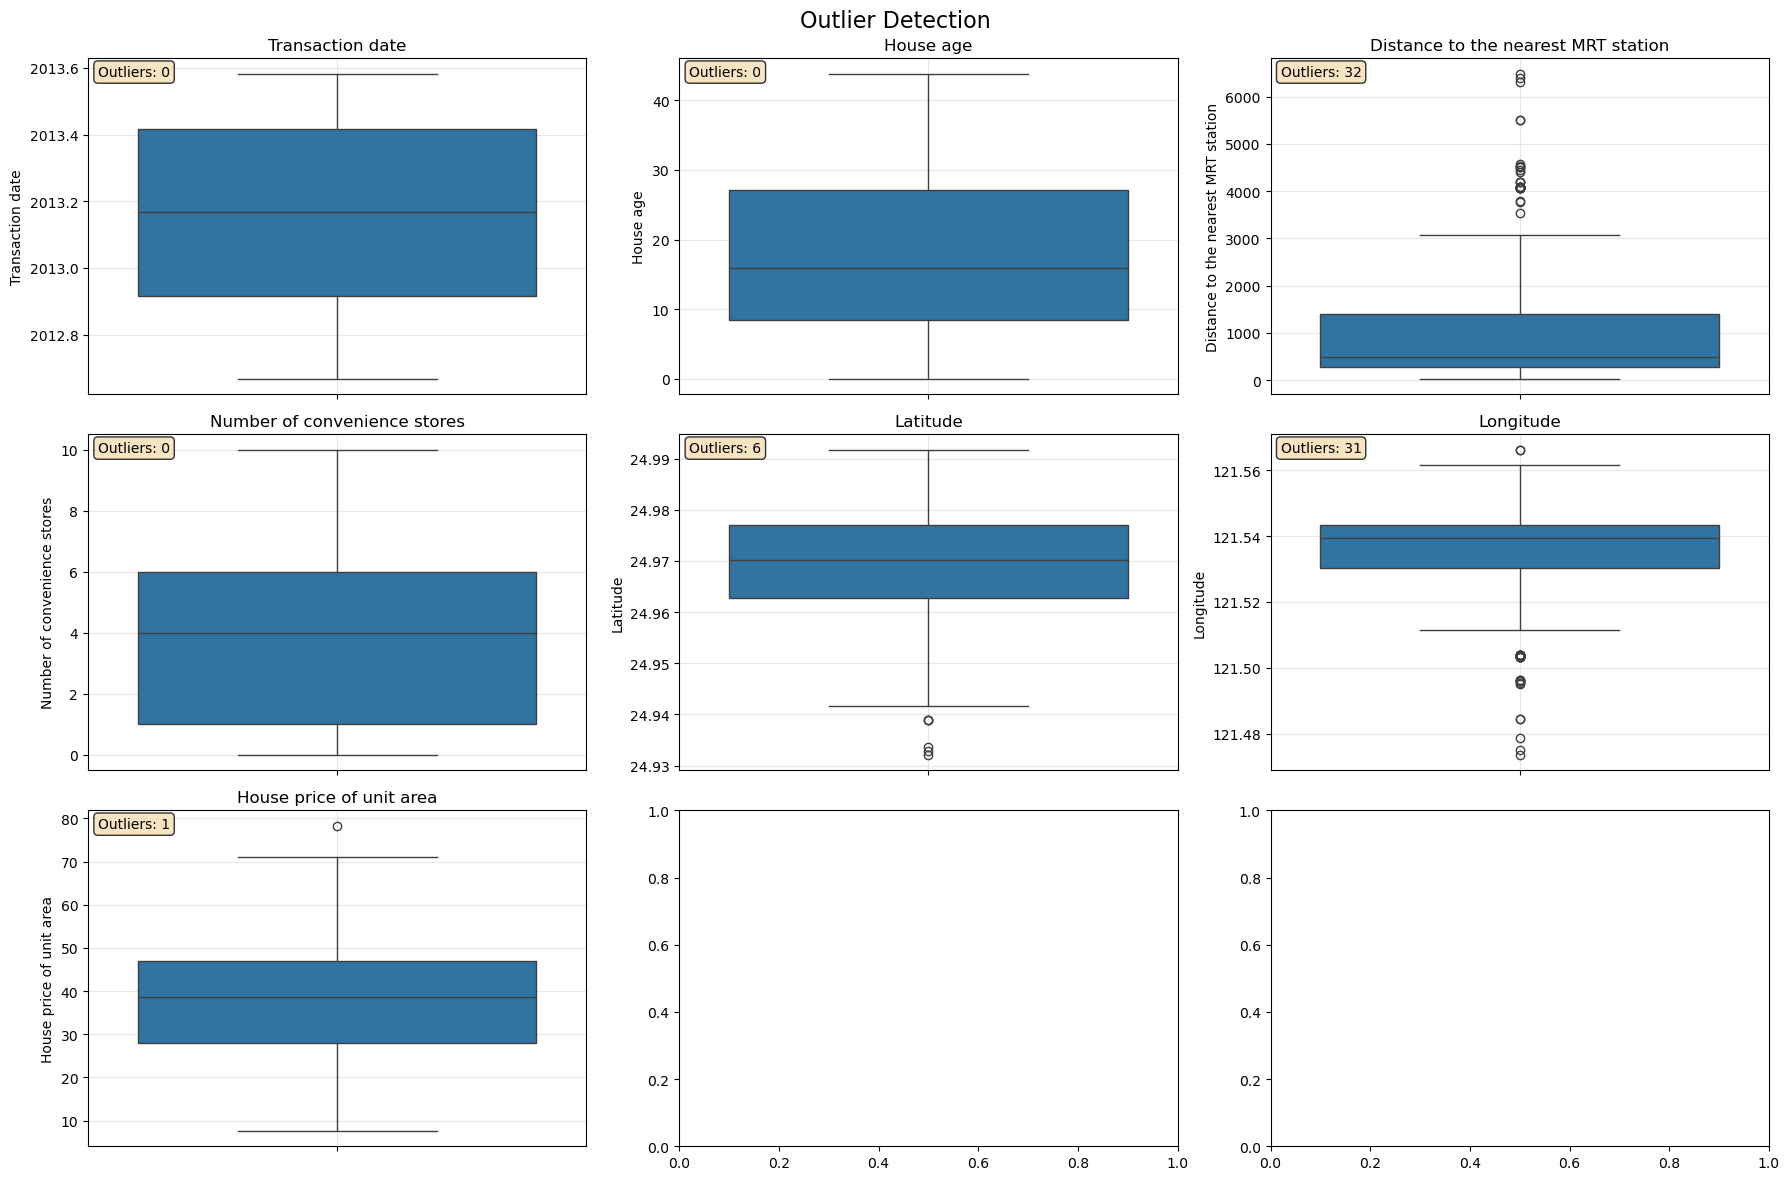

In [32]:
# Create box plots for all numerical features to visualize outliers
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle('Outlier Detection', fontsize=16)

lower_bounds = dict()
upper_bounds = dict()

for i, col in enumerate(numerical_columns):
    row = i // 3
    col_idx = i % 3
    
    # Create box plot
    sns.boxplot(data=df_train, y=col, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'{col}')
    axes[row, col_idx].grid(True, alpha=0.3)
    
    # Add outlier count as text
    outliers, lower_bound, upper_bound = detect_outliers_iqr(df_train, col)
    lower_bounds[col] = lower_bound
    upper_bounds[col] = upper_bound
    
    axes[row, col_idx].text(0.02, 0.98, f'Outliers: {len(outliers)}', 
                           transform=axes[row, col_idx].transAxes,
                           verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

In [33]:
# # Remove outliers based on IQR method (only if the dataset is big enough)
# for i, col in enumerate(numerical_columns):
    
#     df_train = df_train[df_train[col] >= lower_bounds[col]]
#     df_train = df_train.reset_index(drop=True)
#     df_train = df_train[df_train[col] <= upper_bounds[col]]
#     df_train = df_train.reset_index(drop=True)

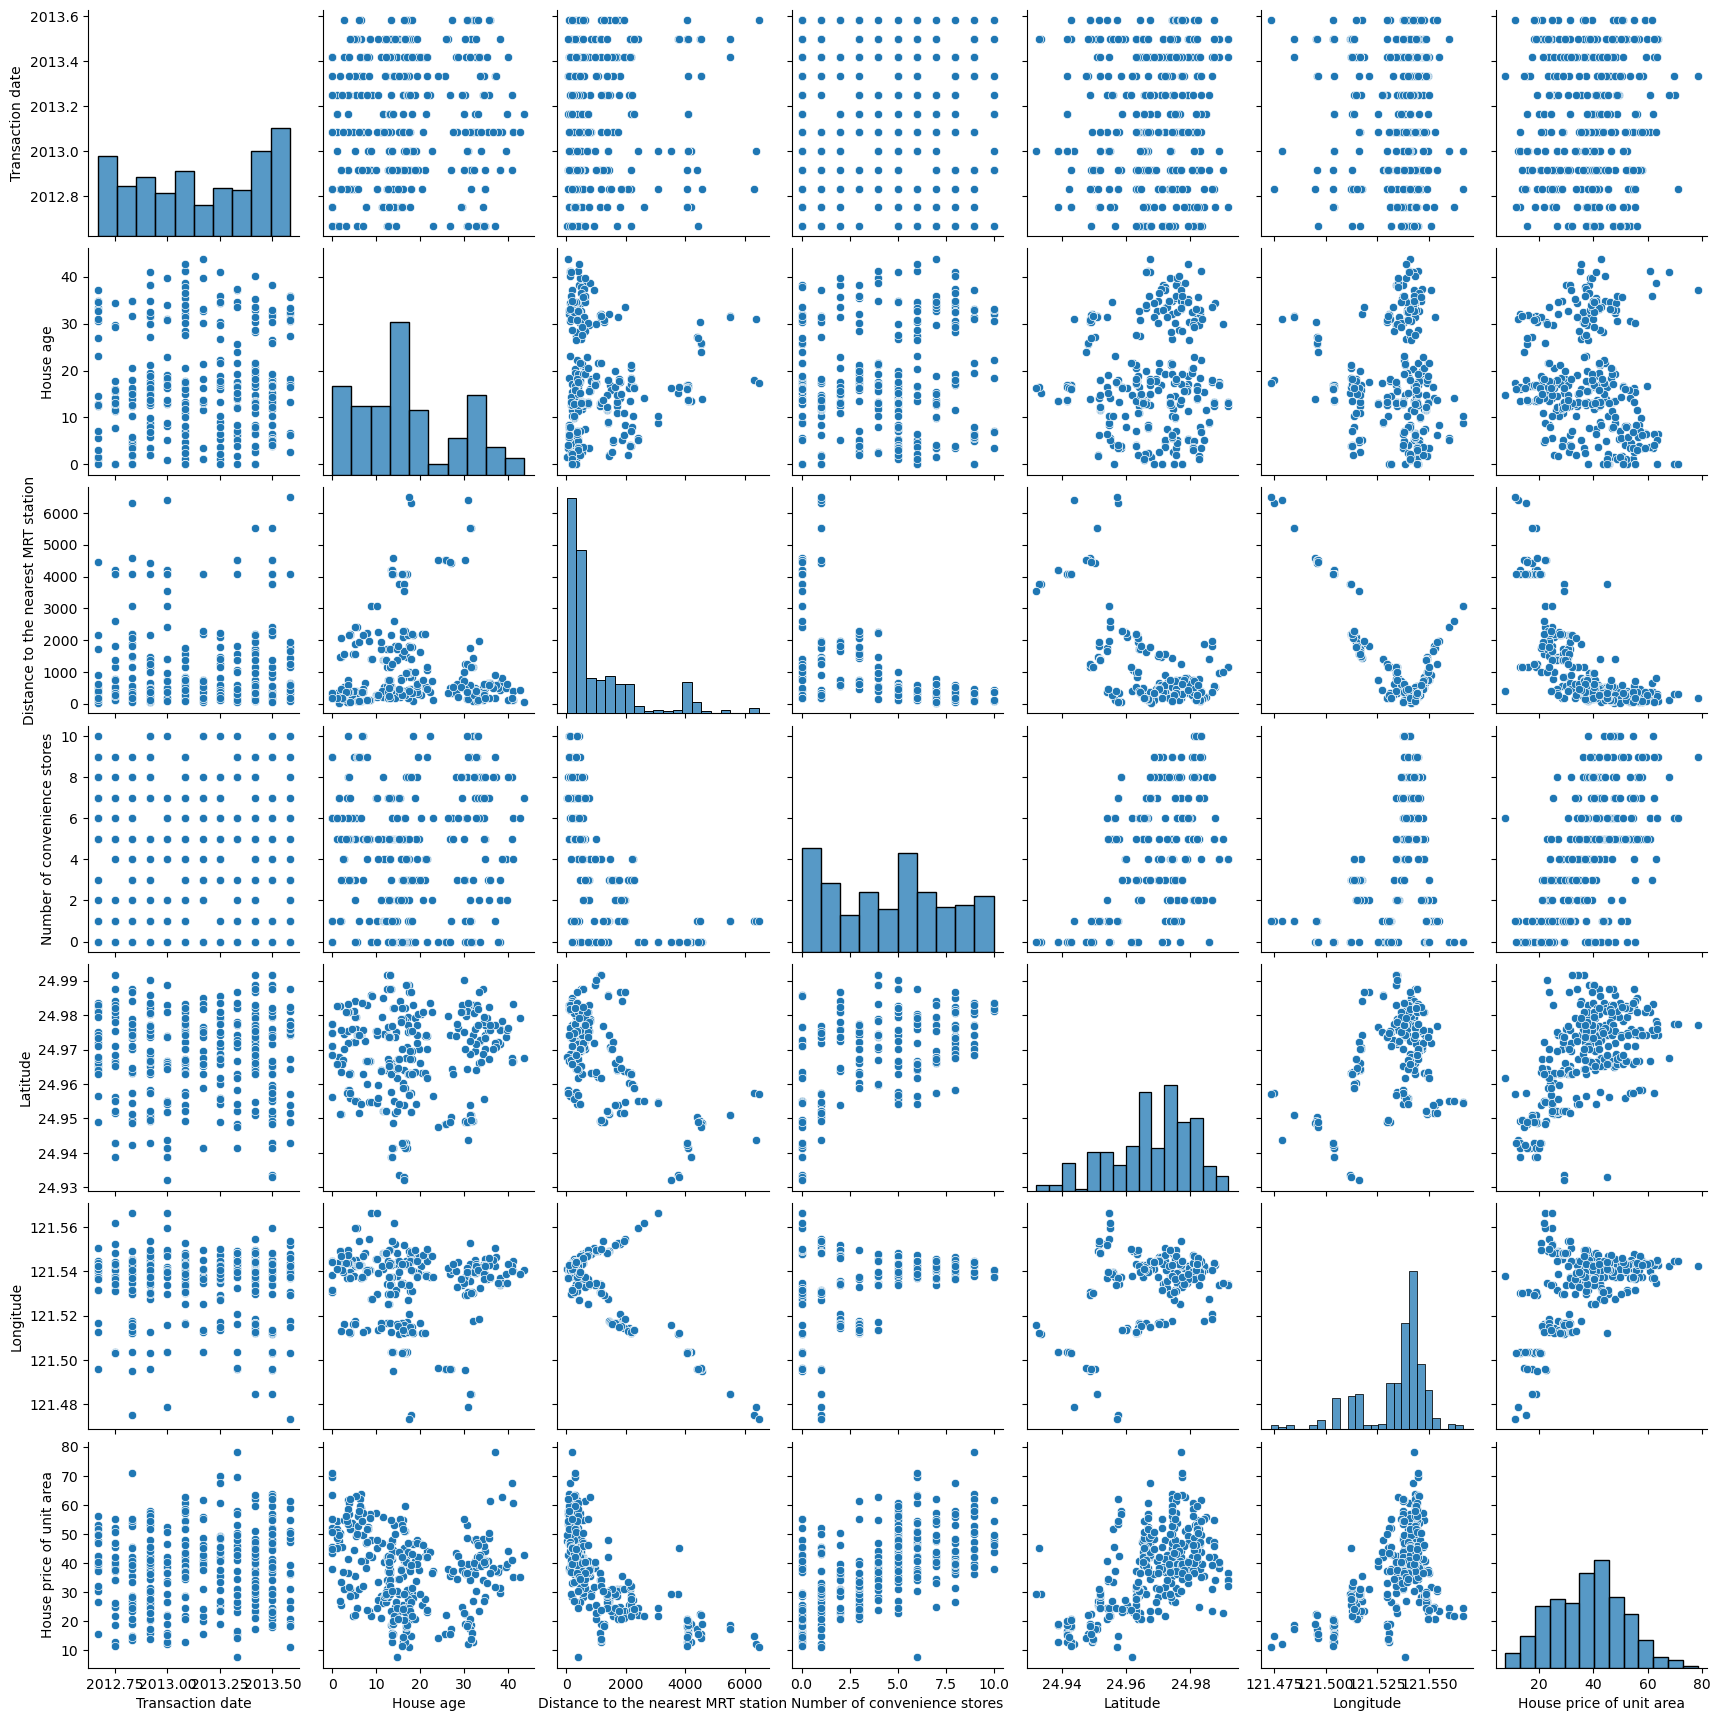

In [34]:
# Show the distribution of all columns
sns.pairplot(df_train)

In [35]:
# Show statistical information of the dataset
df_train.describe()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000
mean,2013.152620,17.339157,1063.409753,4.126506,24.968223,121.534090,37.943072
std,0.281682,11.280054,1293.057147,3.006884,0.012547,0.015464,13.206180
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,8.475000,274.014400,1.000000,24.962770,121.530390,28.000000
50%,2013.167000,15.900000,492.231300,4.000000,24.970160,121.539535,38.700000
75%,2013.417000,27.150000,1403.119500,6.000000,24.977110,121.543480,47.025000
max,2013.583000,43.800000,6488.021000,10.000000,24.991760,121.566270,78.300000


In [36]:
# Separate features and labels
y_train = df_train['House price of unit area']
X_train = df_train.drop(['House price of unit area'], axis=1)

In [37]:
# MinMax Scaling
numeric_cols = X_train.select_dtypes(include='number').columns

scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

X_train[numeric_cols] = scaler_X.fit_transform(X_train[numeric_cols])
y_train = scaler_Y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
pd.DataFrame(y_train, columns=['House price of unit area'])

,House price of unit area
0,0.268741
1,0.670438
2,0.751061
3,0.635078
4,0.374823
...,...
327,0.237624
328,0.391796
329,0.527581
330,0.673267


### 3.2 Testing Data

In [38]:
# Size of Dataset
print(f"Number of rows: {df_test.shape[0]}")
print(f"Number of columns: {df_test.shape[1]}")

Number of rows: 82
Number of columns: 8


In [39]:
# Drop unnecessary columns
df_test = df_test.drop(['No'], axis=1)
df_test = df_test.reset_index(drop=True)
df_test.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [40]:
# Remove duplicated columns
# This will retain the first occurrences, change as you want
dup_cols = df_test.columns.duplicated()
cols = list(df_test.columns)
print(f"Duplicated Columns: \n{[cols[i] for i in range(len(cols)) if dup_cols[i]]}")

df_test = df_test.loc[:,~df_test.columns.duplicated()].copy()

print("After removing...")

dup_cols = df_test.columns.duplicated()
cols = list(df_test.columns)
print(f"Duplicated Columns: \n{[cols[i] for i in range(len(cols)) if dup_cols[i]]}")

Duplicated Columns: 
[]
After removing...
Duplicated Columns: 
[]


In [41]:
# Remove row with missing values
df_test = df_test.dropna()
df_test = df_test.reset_index(drop=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     82 non-null     float64
 1   X2 house age                            82 non-null     float64
 2   X3 distance to the nearest MRT station  82 non-null     float64
 3   X4 number of convenience stores         82 non-null     int64  
 4   X5 latitude                             82 non-null     float64
 5   X6 longitude                            82 non-null     float64
 6   Y house price of unit area              82 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 4.6 KB


In [42]:
# Rename columns
headers = ["Transaction date", "House age", "Distance to the nearest MRT station",
           "Number of convenience stores", "Latitude", "Longitude", "House price of unit area"]
df_test.columns = headers
df_test.columns

Index(['Transaction date', 'House age', 'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude',
       'House price of unit area'],
      dtype='object')

In [43]:
# # Change the data type of invalid columns
# df_test["Target class"] = df_test["Target class"].astype("int64")
# df_test.info()

In [44]:
# # Drop poor features (to avoid overfitting)
# df_test = df_test.drop(['VendorID'], axis=1)
# df_test = df_test.reset_index(drop=True)
# df_test = df_test.drop(['payment_type'], axis=1)
# df_test = df_test.reset_index(drop=True)
# df_test.columns

In [45]:
# # Drop correlated features
# df_test = df_test.drop(['country'], axis=1)
# df_test = df_test.reset_index(drop=True)
# df_test.columns

In [46]:
# # Drop unimportant features
# df_test = df_test.drop(['country'], axis=1)
# df_test = df_test.reset_index(drop=True)
# df_test.columns

In [47]:
# # Encode categorical columns using OrdinalEncoder
# categorical_cols = list(set(df_test.columns.to_list()) - set(df_test._get_numeric_data().columns.to_list()))

# enc_maps = {
#     "buying price" : [{'col': "buying price", 'mapping': {"low": 0, "medium": 1, "high": 2, "very high": 3}}],
#     "maintenance cost" : [{'col': "maintenance cost", 'mapping': {"low": 0, "medium": 1, "high": 2, "very high": 3}}],
#     "number of doors" : [{'col': "number of doors", 'mapping': {"2": 0, "3": 1, "4": 2, "more": 3}}],
#     "number of persons" : [{'col': "number of persons", 'mapping': {"2": 0, "4": 1, "more": 2}}],
#     "luggage boot" : [{'col': "luggage boot", 'mapping': {"small": 0, "medium": 1, "big": 2}}],
#     "safety" : [{'col': "safety", 'mapping': {"low": 0, "medium": 1, "high": 2}}],
#     "decision" : [{'col': "decision", 'mapping': {"unaccepted": 0, "accepted": 1, "good": 2, "very good": 3}}]
# }

# for col in categorical_cols:
#     enc_map = enc_maps[col]

#     enc = OrdinalEncoder(mapping=enc_map)
#     df_test = enc.fit_transform(df_test)


# df_test

In [48]:
# Separate features and labels
X_test = df_train.drop(['House price of unit area'], axis=1)
y_test = df_train['House price of unit area']

In [49]:
# MinMax Scaling
numeric_cols = X_test.select_dtypes(include='number').columns

scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

X_test[numeric_cols] = scaler_X.fit_transform(X_test[numeric_cols])
y_test = scaler_Y.fit_transform(y_test.values.reshape(-1, 1)).flatten()
pd.DataFrame(y_test, columns=['House price of unit area'])

,House price of unit area
0,0.268741
1,0.670438
2,0.751061
3,0.635078
4,0.374823
...,...
327,0.237624
328,0.391796
329,0.527581
330,0.673267


# 4. SVC

In [50]:
model = SVR()
model.fit(X_train, y_train)

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [51]:
model.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [52]:
# Evaluate the model

residual_df = None

def evaluate_model(model, X_test, y_test):    
    y_pred = model.predict(X_test)
    y_pred = scaler_Y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
    y_test = scaler_Y.inverse_transform(y_test.reshape(-1, 1)).flatten()
    
    global residual_df
    residual_df = pd.DataFrame({'Y_Test': y_test, 'Y_Pred': y_pred, 'Residuals':(y_test-y_pred) }).head(5)
    
    mae = mean_absolute_error(y_test, y_pred)
    print("MAE:", mae)
    mse = mean_squared_error(y_test, y_pred)
    print("MSE:", mse)
    rmse = math.sqrt(mse)
    print("RMSE:", rmse)
    r2 = r2_score(y_test, y_pred)
    print("R^2:", r2)

print("Regression Tree")
evaluate_model(model, X_test, y_test)

Regression Tree
MAE: 4.759490038623115
MSE: 36.67884047116056
RMSE: 6.056305843594803
R^2: 0.7890540084714812


In [53]:
residual_df

,Y_Test,Y_Pred,Residuals
0,26.6,21.034706,5.565294
1,55.0,46.957782,8.042218
2,60.7,45.601231,15.098769
3,52.5,45.590905,6.909095
4,34.1,39.996706,-5.896706


# 5. Tuning

In [54]:
base_model = SVR()

params = {
    'kernel': ["linear", "poly", "rbf", "sigmoid"],
}

grid_search = GridSearchCV(estimator=base_model, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [55]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 4 candidates, totalling 16 fits
CPU times: total: 219 ms
Wall time: 3.6 s


c:\Users\Dimas_Tri_Kurniawan\anaconda3\envs\dsrwc\Lib\site-packages\sklearn\model_selection\_search.py:1135: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(


,estimator,SVR()
,param_grid,"{'kernel': ['linear', 'poly', ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,4
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,kernel,'linear'


In [56]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005832,0.000935,0.007916,0.002024,linear,{'kernel': 'linear'},NaN,NaN,NaN,NaN,NaN,NaN,1
1,0.020383,0.002759,0.005407,0.000911,poly,{'kernel': 'poly'},NaN,NaN,NaN,NaN,NaN,NaN,1
2,0.003915,0.000562,0.003115,0.000731,rbf,{'kernel': 'rbf'},NaN,NaN,NaN,NaN,NaN,NaN,1
3,0.005783,0.000235,0.003389,0.000633,sigmoid,{'kernel': 'sigmoid'},NaN,NaN,NaN,NaN,NaN,NaN,1


In [57]:
best_params = grid_search.best_estimator_
best_params

,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [58]:
# Evaluate the best model
evaluate_model(best_params, X_test, y_test)

MAE: 6.01392668536823
MSE: 63.86366579332229
RMSE: 7.991474569397208
R^2: 0.6327096459330341


# 6. Testing Model (if test dataset exists)